## Load Dataset

In [10]:
import pandas as pd
import numpy as np
df = pd.read_csv('loan.csv')
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Dataset Info

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Data Cleaning

In [12]:
df.drop("Loan_ID", axis=1, inplace=True)
# Checking the Missing Values
df.isnull().sum()


Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Encode 

In [13]:
df.Gender = df.Gender.map({'Male': 1, 'Female': 0})
df.Married = df.Married.map({'Yes': 1, 'No': 0})
df.Dependents = df.Dependents.map({'0': 0, '1': 1, '2': 2,  '3+': 3})
df.Education = df.Education.map({'Graduate': 1, 'Not Graduate': 0})
df.Self_Employed = df.Self_Employed.map({'Yes': 1, 'No': 0})
df.Property_Area = df.Property_Area.map(
    {'Urban': 1, 'Semiurban': 0.5, 'Rural': 0})
df = df.fillna({'Gender': 0.5, 'Married': 0.5,
                'Dependents': df['Dependents'].mean(),
                'Self_Employed': df['Self_Employed'].mean(),
                'LoanAmount': df['LoanAmount'].mean(),
                'Loan_Amount_Term': df['Loan_Amount_Term'].mean(),
                'Credit_History': df['Credit_History'].mean()})

df.Loan_Status = df.Loan_Status.map({'Y': 1, 'N': 0})


## Data process

In [14]:
# Task3 split the dataset into X_train, X_test, y_train, y_test
# Optional: you can also use normalization
train = df.sample(frac=0.9, random_state=3, axis=0)
test = df[~df.index.isin(train.index)]

X_train = train.loc[:, 'Gender':'Loan_Status']
Y_train = train.loc[:, 'Loan_Status':'Loan_Status']
X_test = test.loc[:, 'Gender':'Loan_Status']
Y_test = test.loc[:, 'Loan_Status':'Loan_Status']


## Train

In [15]:
from Logistic import LogisticRegression

loss_1 = []
LR_1 = LogisticRegression(0.001, 1000, loss_1)
LR_1.fit(X_train, Y_train)

# loss_2 = []
# LR_2 = LogisticRegression(0.001, 10000, loss_2)
# LR_2.fit(X_train, Y_train)



/Users/howlin0523/SynologyDrive/GitHub/22F_Introduction_to_Machine_Learning/lab1/Logistic.py:34: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train_x.iloc[:, i] = (


train 1000  times


## Test

In [16]:
pre_1 = LR_1.predict(X_test)
LR_1.evaluate(pre_1, Y_test)

# pre_2 = LR_2.predict(X_test)
# LR_2.evaluate(pre_2, Y_test)



correct rate: 0.9672131147540983


/Users/howlin0523/SynologyDrive/GitHub/22F_Introduction_to_Machine_Learning/lab1/Logistic.py:76: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test_x.iloc[:, i] = (test_x.iloc[:, i] -


## loss curve

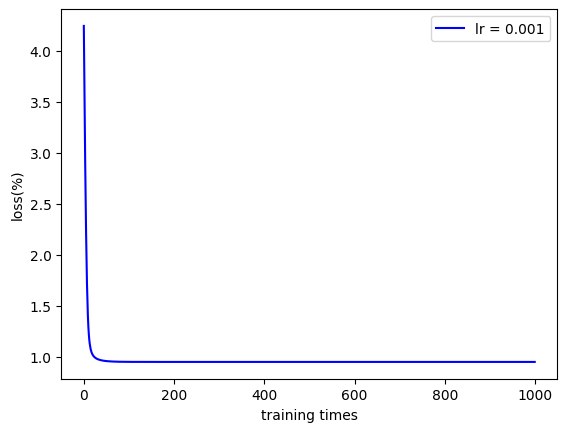

In [17]:
import matplotlib.pyplot as plt
times_1 = np.arange(0, LR_1.tr_times)
losses_1 = np.array(LR_1.loss).flatten()
l1, = plt.plot(times_1, losses_1, label='lr = 0.001', color = 'b')

# times_2 = np.arange(0, LR_2.tr_times)
# losses_2 = np.array(LR_2.loss).flatten()
# l2, = plt.plot(times_2, losses_2, label='lr = 0.001', color = 'g')




plt.xlabel("training times")
plt.ylabel("loss(%)")
plt.legend(loc='upper right')

plt.show()


In [18]:
print(LR_1.w)

[[-0.27971592]
 [ 0.03282886]
 [ 0.4653684 ]
 [-0.15817547]
 [ 0.63212212]
 [ 0.88765058]
 [ 0.91801593]
 [ 0.60895457]
 [-0.11652041]
 [ 0.38934097]
 [ 0.17718697]
 [ 1.81356296]
 [-0.61681729]]
